Importa las bibliotecas necesarias para tu análisis de ordenamiento y búsqueda

In [1]:
import time  # Para medir el tiempo de ejecución de los algoritmos.
import re  # Para trabajar con expresiones regulares.
import matplotlib.pyplot as plt  # Para crear gráficos de barras con los resultados.
import seaborn as sns  # Para mejorar la visualización de los gráficos.
from tabulate import tabulate  # Para mostrar los resultados en formato de tabla.
from collections import Counter  # Para contar elementos en colecciones de datos.
from rich.console import Console  # Para mejorar la salida en la terminal con colores y estilos.
from rich.table import Table  # Para mostrar datos en formato de tabla en la terminal.
from rich.panel import Panel  # Para mostrar cuadros de información en la terminal con formato atractivo.

Función para extraer abstracts del archivo .RIS

In [2]:
def extract_abstracts_from_ris(file_path):
    with open(file_path, "r", encoding="utf-8") as file:
        content = file.read()
        # Expresión regular para extraer los abstracts (líneas que comienzan con "AB  -")
        abstracts = re.findall(r"AB  - (.+)", content)
        return abstracts

Lista de términos clave

In [3]:
terms = ["Abstraction", "Motivation", "Algorithm", "Persistence", "Coding",
         "Block", "Creativity", "Mobile application", "Logic", "Programming",
         "Conditionals", "Robotic", "Loops", "Scratch"]

Procesar el archivo RIS

In [4]:
file_path = '../articulos/unique_articles.ris'
abstracts = extract_abstracts_from_ris(file_path)

Unir todos los abstracts en un solo texto

In [5]:
full_text = " ".join(abstracts).lower()

Contar la frecuencia de cada término clave

In [6]:
frequencies = {term: full_text.count(term.lower()) for term in terms}

...

In [7]:
import sys

# Ruta absoluta a la carpeta raíz del proyecto
sys.path.append(r'C:\Users\eduar\Downloads\tarea2')

Metodo de ordenamiento Tim Sort

In [8]:
from algoritmos.TimSorted import TimSorted

Metodo de ordenamiento Comb Sort

In [9]:
from algoritmos.CombSort import CombSort

Metodo de ordenamiento Selection Sort

In [10]:
from algoritmos.SelectionSort import SelectionSort

Metodo de ordenamiento Tree Sort

In [11]:
from algoritmos.TreeSort import TreeSort

Metodo de ordenamiento Pigeonhole Sort

In [12]:
from algoritmos.PigeonholeSort import PigeonholeSort

Metodo de ordenamiento Bucket Sort

In [13]:
from algoritmos.BucketSort import BucketSort

Metodo de ordenamiento Quick Sort

In [14]:
from algoritmos.QuickSort import QuickSort

Metodo de ordenamiento Heap Sort

In [15]:
from algoritmos.HeapSort import HeapSort

Metodo de ordenamiento Bitonic Sort

In [16]:
from algoritmos.BitonicSort import BitonicSort

Metodo de ordenamiento Gnome Sort

In [17]:
from algoritmos.GnomeSort import GnomeSort

Metodo de ordenamiento Binary Insertion Sort

In [18]:
from algoritmos.BinaryInsertionSort import BinaryInsertionSort

Metodo de ordenamiento Radix Sort

In [19]:
from algoritmos.RadixSort import RadixSort

Metodo de ordenamiento Bubble Sort

In [20]:
from algoritmos.BubbleSort import BubbleSort

Metodo de ordenamiento Cocktail Sort

In [21]:
from algoritmos.CocktailSort import CocktailSort

Metodo de ordenamiento Shell Sort

In [22]:
from algoritmos.ShellSort import ShellSort

Metodo de ordenamiento Merge Sort

In [23]:
from algoritmos.MergeSort import MergeSort

Metodo de ordenamiento Insertion Sort

In [24]:
from algoritmos.InsertionSort import InsertionSort

Diccionario con los métodos

In [25]:
tsorting_algorithms = {
    "TimSort": TimSorted().tim_sort,
    "Comb Sort": CombSort().comb_sort,
    "Selection Sort": SelectionSort().selection_sort,
    "Tree Sort": TreeSort().tree_sort,
    "Pigeonhole Sort": PigeonholeSort().pigeonhole_sort,
    "Bucket Sort": BucketSort().bucket_sort,
    "Quick Sort": QuickSort().quick_sort,
    "Heap Sort": HeapSort().heap_sort,
    "Bitonic Sort": BitonicSort().bitonic_sort,
    "Gnome Sort": GnomeSort().gnome_sort,
    "Binary Insertion Sort": BinaryInsertionSort().binary_insertion_sort,
    "Radix Sort": RadixSort().radix_sort,
    "Bubble Sort": BubbleSort().bubble_sort,
    "Cocktail Sort": CocktailSort().cocktail_sort,
    "Merge Sort": MergeSort().merge_sort,
    "Insertion Sort": InsertionSort().insertion_sort,
    "Shell Sort": ShellSort().shell_sort
}

Medir tiempo de ejecución

In [26]:
def measure_time(sort_function, data):
    start = time.time()
    sorted_data = sort_function(data)
    end = time.time()
    return sorted_data, end - start

Ordenar y medir tiempos

In [27]:
results = []

for name, algorithm in tsorting_algorithms.items():
    sorted_results, exec_time = measure_time(algorithm, list(frequencies.items()))
    results.append((name, exec_time))

    print(f"Ordenamiento usando {name}:")
    print(tabulate(sorted_results, headers=["Término", "Frecuencia"], tablefmt="grid"))
    print(f"Tiempo de ejecución: {exec_time:.6f} segundos\n")

Ordenamiento usando TimSort:
+--------------------+--------------+
| Término            |   Frecuencia |
+====================+==============+
| Persistence        |            1 |
+--------------------+--------------+
| Conditionals       |            6 |
+--------------------+--------------+
| Mobile application |            8 |
+--------------------+--------------+
| Loops              |           15 |
+--------------------+--------------+
| Abstraction        |           93 |
+--------------------+--------------+
| Motivation         |          125 |
+--------------------+--------------+
| Block              |          134 |
+--------------------+--------------+
| Robotic            |          137 |
+--------------------+--------------+
| Scratch            |          153 |
+--------------------+--------------+
| Creativity         |          164 |
+--------------------+--------------+
| Coding             |          172 |
+--------------------+--------------+
| Logic              

Ver en tablas

In [28]:
from rich.console import Console
from rich.table import Table

console = Console()

results = []

for name, algorithm in tsorting_algorithms.items():
    sorted_results, exec_time = measure_time(algorithm, list(frequencies.items()))
    results.append((name, exec_time))

    # Crear tabla con Rich
    table = Table(
        title=f"[white]Resultados Ordenados con {name}[/]",
        show_header=True,
        header_style="bold magenta"
    )

    # Añadir columnas
    table.add_column("Término", style="green")
    table.add_column("Frecuencia", style="blue", justify="right")

    # Añadir filas con los datos ordenados
    for term, freq in sorted_results:
        table.add_row(term, str(freq))

    # Mostrar la tabla y el tiempo de ejecución
    console.print(table)
    console.print(f"[bold]Tiempo de ejecución:[/] [green]{exec_time:.6f} segundos[/]\n")

 Resultados Ordenados con TimSort  
┏━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Término            ┃ Frecuencia ┃
┡━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━┩
│ Persistence        │          1 │
│ Conditionals       │          6 │
│ Mobile application │          8 │
│ Loops              │         15 │
│ Abstraction        │         93 │
│ Motivation         │        125 │
│ Block              │        134 │
│ Robotic            │        137 │
│ Scratch            │        153 │
│ Creativity         │        164 │
│ Coding             │        172 │
│ Logic              │        336 │
│ Algorithm          │        337 │
│ Programming        │        879 │
└────────────────────┴────────────┘

Tiempo de ejecución: 0.000008 segundos

Resultados Ordenados con Comb Sort 
┏━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Término            ┃ Frecuencia ┃
┡━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━┩
│ Persistence        │          1 │
│ Conditionals       │          6 │
│ Mobile application │          8 │
│ Loops              │         15 │
│ Abstraction        │         93 │
│ Motivation         │        125 │
│ Block              │        134 │
│ Robotic            │        137 │
│ Scratch            │        153 │
│ Creativity         │        164 │
│ Coding             │        172 │
│ Logic              │        336 │
│ Algorithm          │        337 │
│ Programming        │        879 │
└────────────────────┴────────────┘

Tiempo de ejecución: 0.000035 segundos

Resultados Ordenados con Selection 
               Sort                
┏━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Término            ┃ Frecuencia ┃
┡━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━┩
│ Persistence        │          1 │
│ Conditionals       │          6 │
│ Mobile application │          8 │
│ Loops              │         15 │
│ Abstraction        │         93 │
│ Motivation         │        125 │
│ Block              │        134 │
│ Robotic            │        137 │
│ Scratch            │        153 │
│ Creativity         │        164 │
│ Coding             │        172 │
│ Logic              │        336 │
│ Algorithm          │        337 │
│ Programming        │        879 │
└────────────────────┴────────────┘

Tiempo de ejecución: 0.000011 segundos

Resultados Ordenados con Tree Sort 
┏━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Término            ┃ Frecuencia ┃
┡━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━┩
│ Persistence        │          1 │
│ Conditionals       │          6 │
│ Mobile application │          8 │
│ Loops              │         15 │
│ Abstraction        │         93 │
│ Motivation         │        125 │
│ Block              │        134 │
│ Robotic            │        137 │
│ Scratch            │        153 │
│ Creativity         │        164 │
│ Coding             │        172 │
│ Logic              │        336 │
│ Algorithm          │        337 │
│ Programming        │        879 │
└────────────────────┴────────────┘

Tiempo de ejecución: 0.000020 segundos

Resultados Ordenados con Pigeonhole
               Sort                
┏━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Término            ┃ Frecuencia ┃
┡━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━┩
│ Persistence        │          1 │
│ Conditionals       │          6 │
│ Mobile application │          8 │
│ Loops              │         15 │
│ Abstraction        │         93 │
│ Motivation         │        125 │
│ Block              │        134 │
│ Robotic            │        137 │
│ Scratch            │        153 │
│ Creativity         │        164 │
│ Coding             │        172 │
│ Logic              │        336 │
│ Algorithm          │        337 │
│ Programming        │        879 │
└────────────────────┴────────────┘

Tiempo de ejecución: 0.000545 segundos

  Resultados Ordenados con Bucket  
               Sort                
┏━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Término            ┃ Frecuencia ┃
┡━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━┩
│ Persistence        │          1 │
│ Conditionals       │          6 │
│ Mobile application │          8 │
│ Loops              │         15 │
│ Abstraction        │         93 │
│ Motivation         │        125 │
│ Block              │        134 │
│ Robotic            │        137 │
│ Scratch            │        153 │
│ Creativity         │        164 │
│ Coding             │        172 │
│ Logic              │        336 │
│ Algorithm          │        337 │
│ Programming        │        879 │
└────────────────────┴────────────┘

Tiempo de ejecución: 0.000045 segundos

Resultados Ordenados con Quick Sort
┏━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Término            ┃ Frecuencia ┃
┡━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━┩
│ Persistence        │          1 │
│ Conditionals       │          6 │
│ Mobile application │          8 │
│ Loops              │         15 │
│ Abstraction        │         93 │
│ Motivation         │        125 │
│ Block              │        134 │
│ Robotic            │        137 │
│ Scratch            │        153 │
│ Creativity         │        164 │
│ Coding             │        172 │
│ Logic              │        336 │
│ Algorithm          │        337 │
│ Programming        │        879 │
└────────────────────┴────────────┘

Tiempo de ejecución: 0.000025 segundos

Resultados Ordenados con Heap Sort 
┏━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Término            ┃ Frecuencia ┃
┡━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━┩
│ Abstraction        │         93 │
│ Algorithm          │        337 │
│ Block              │        134 │
│ Coding             │        172 │
│ Conditionals       │          6 │
│ Creativity         │        164 │
│ Logic              │        336 │
│ Loops              │         15 │
│ Mobile application │          8 │
│ Motivation         │        125 │
│ Persistence        │          1 │
│ Programming        │        879 │
│ Robotic            │        137 │
│ Scratch            │        153 │
└────────────────────┴────────────┘

Tiempo de ejecución: 0.000014 segundos

 Resultados Ordenados con Bitonic  
               Sort                
┏━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Término            ┃ Frecuencia ┃
┡━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━┩
│ Persistence        │          1 │
│ Conditionals       │          6 │
│ Mobile application │          8 │
│ Loops              │         15 │
│ Abstraction        │         93 │
│ Motivation         │        125 │
│ Block              │        134 │
│ Robotic            │        137 │
│ Scratch            │        153 │
│ Creativity         │        164 │
│ Coding             │        172 │
│ Logic              │        336 │
│ Algorithm          │        337 │
│ Programming        │        879 │
└────────────────────┴────────────┘

Tiempo de ejecución: 0.000006 segundos

Resultados Ordenados con Gnome Sort
┏━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Término            ┃ Frecuencia ┃
┡━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━┩
│ Persistence        │          1 │
│ Conditionals       │          6 │
│ Mobile application │          8 │
│ Loops              │         15 │
│ Abstraction        │         93 │
│ Motivation         │        125 │
│ Block              │        134 │
│ Robotic            │        137 │
│ Scratch            │        153 │
│ Creativity         │        164 │
│ Coding             │        172 │
│ Logic              │        336 │
│ Algorithm          │        337 │
│ Programming        │        879 │
└────────────────────┴────────────┘

Tiempo de ejecución: 0.000017 segundos

  Resultados Ordenados con Binary  
          Insertion Sort           
┏━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Término            ┃ Frecuencia ┃
┡━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━┩
│ Persistence        │          1 │
│ Conditionals       │          6 │
│ Mobile application │          8 │
│ Loops              │         15 │
│ Abstraction        │         93 │
│ Motivation         │        125 │
│ Block              │        134 │
│ Robotic            │        137 │
│ Scratch            │        153 │
│ Creativity         │        164 │
│ Coding             │        172 │
│ Logic              │        336 │
│ Algorithm          │        337 │
│ Programming        │        879 │
└────────────────────┴────────────┘

Tiempo de ejecución: 0.000025 segundos

Resultados Ordenados con Radix Sort
┏━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Término            ┃ Frecuencia ┃
┡━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━┩
│ Persistence        │          1 │
│ Conditionals       │          6 │
│ Mobile application │          8 │
│ Loops              │         15 │
│ Abstraction        │         93 │
│ Motivation         │        125 │
│ Block              │        134 │
│ Robotic            │        137 │
│ Scratch            │        153 │
│ Creativity         │        164 │
│ Coding             │        172 │
│ Logic              │        336 │
│ Algorithm          │        337 │
│ Programming        │        879 │
└────────────────────┴────────────┘

Tiempo de ejecución: 0.000030 segundos

  Resultados Ordenados con Bubble  
               Sort                
┏━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Término            ┃ Frecuencia ┃
┡━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━┩
│ Persistence        │          1 │
│ Conditionals       │          6 │
│ Mobile application │          8 │
│ Loops              │         15 │
│ Abstraction        │         93 │
│ Motivation         │        125 │
│ Block              │        134 │
│ Robotic            │        137 │
│ Scratch            │        153 │
│ Creativity         │        164 │
│ Coding             │        172 │
│ Logic              │        336 │
│ Algorithm          │        337 │
│ Programming        │        879 │
└────────────────────┴────────────┘

Tiempo de ejecución: 0.000023 segundos

 Resultados Ordenados con Cocktail 
               Sort                
┏━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Término            ┃ Frecuencia ┃
┡━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━┩
│ Persistence        │          1 │
│ Conditionals       │          6 │
│ Mobile application │          8 │
│ Loops              │         15 │
│ Abstraction        │         93 │
│ Motivation         │        125 │
│ Block              │        134 │
│ Robotic            │        137 │
│ Scratch            │        153 │
│ Creativity         │        164 │
│ Coding             │        172 │
│ Logic              │        336 │
│ Algorithm          │        337 │
│ Programming        │        879 │
└────────────────────┴────────────┘

Tiempo de ejecución: 0.000012 segundos

Resultados Ordenados con Merge Sort
┏━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Término            ┃ Frecuencia ┃
┡━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━┩
│ Persistence        │          1 │
│ Conditionals       │          6 │
│ Mobile application │          8 │
│ Loops              │         15 │
│ Abstraction        │         93 │
│ Motivation         │        125 │
│ Block              │        134 │
│ Robotic            │        137 │
│ Scratch            │        153 │
│ Creativity         │        164 │
│ Coding             │        172 │
│ Logic              │        336 │
│ Algorithm          │        337 │
│ Programming        │        879 │
└────────────────────┴────────────┘

Tiempo de ejecución: 0.000062 segundos

Resultados Ordenados con Insertion 
               Sort                
┏━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Término            ┃ Frecuencia ┃
┡━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━┩
│ Persistence        │          1 │
│ Conditionals       │          6 │
│ Mobile application │          8 │
│ Loops              │         15 │
│ Abstraction        │         93 │
│ Motivation         │        125 │
│ Block              │        134 │
│ Robotic            │        137 │
│ Scratch            │        153 │
│ Creativity         │        164 │
│ Coding             │        172 │
│ Logic              │        336 │
│ Algorithm          │        337 │
│ Programming        │        879 │
└────────────────────┴────────────┘

Tiempo de ejecución: 0.000012 segundos

Resultados Ordenados con Shell Sort
┏━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Término            ┃ Frecuencia ┃
┡━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━┩
│ Persistence        │          1 │
│ Conditionals       │          6 │
│ Mobile application │          8 │
│ Loops              │         15 │
│ Abstraction        │         93 │
│ Motivation         │        125 │
│ Block              │        134 │
│ Robotic            │        137 │
│ Scratch            │        153 │
│ Creativity         │        164 │
│ Coding             │        172 │
│ Logic              │        336 │
│ Algorithm          │        337 │
│ Programming        │        879 │
└────────────────────┴────────────┘

Tiempo de ejecución: 0.000011 segundos

Graficar resultados

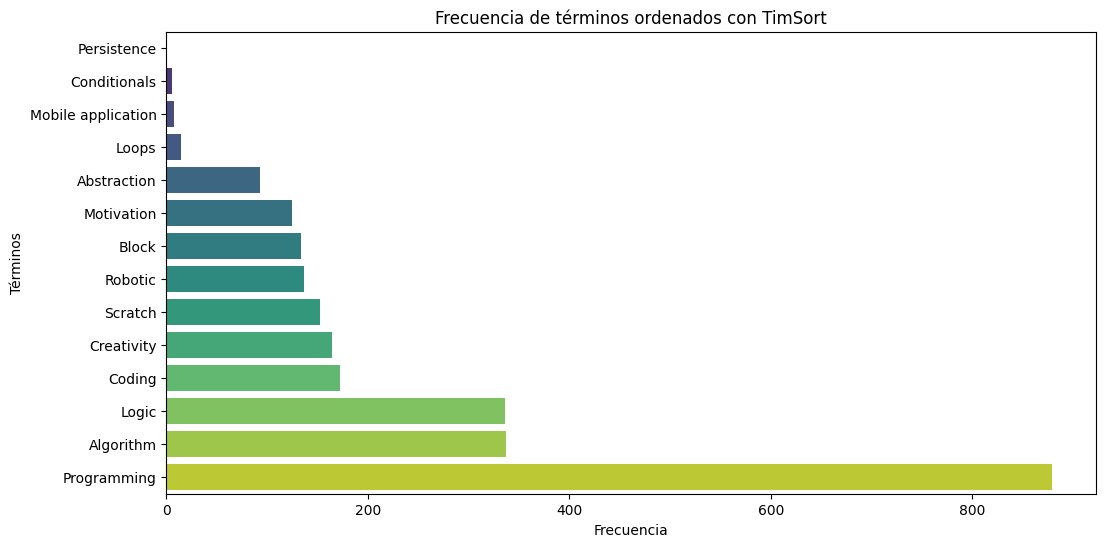

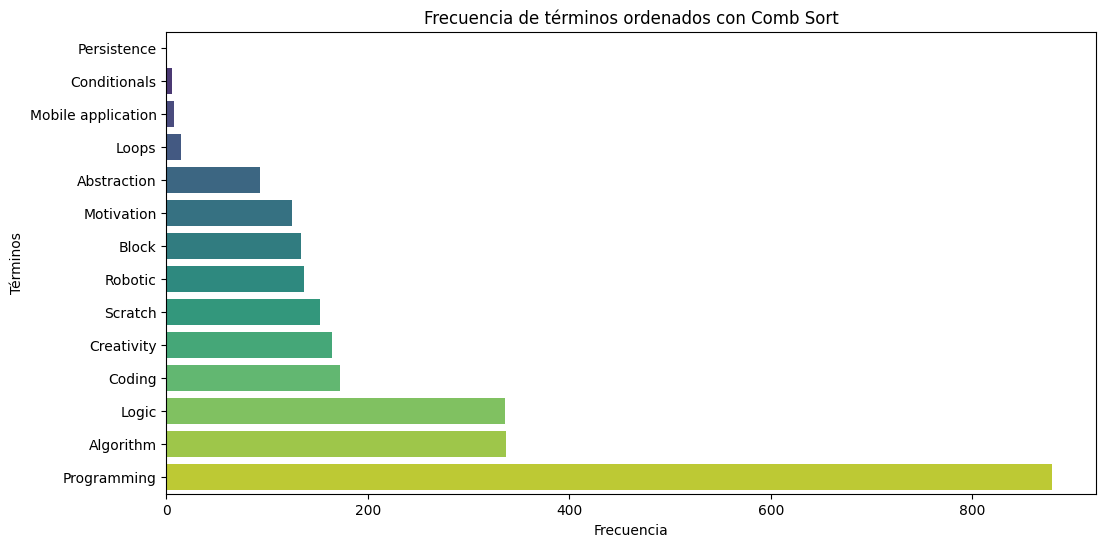

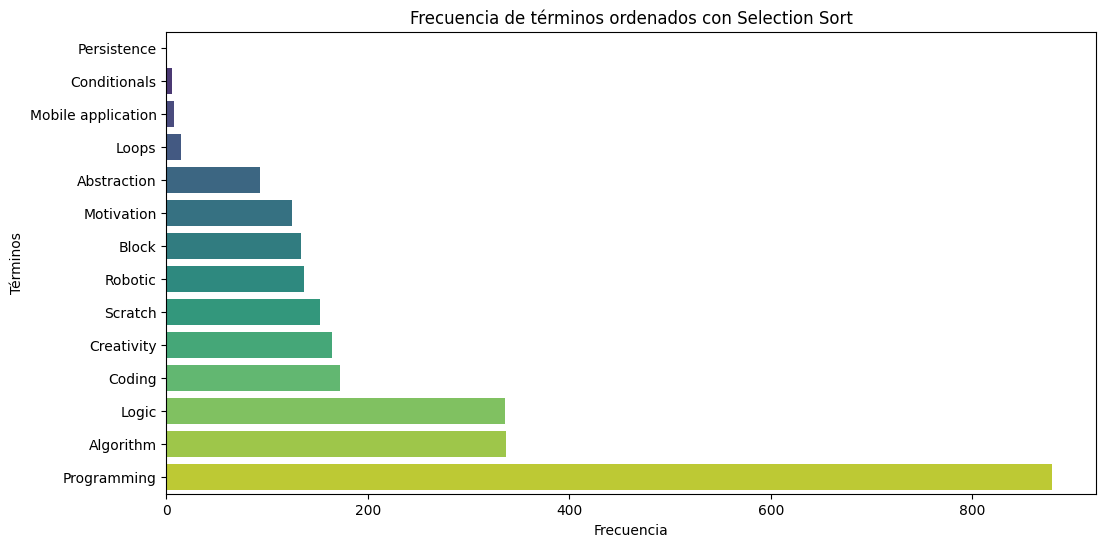

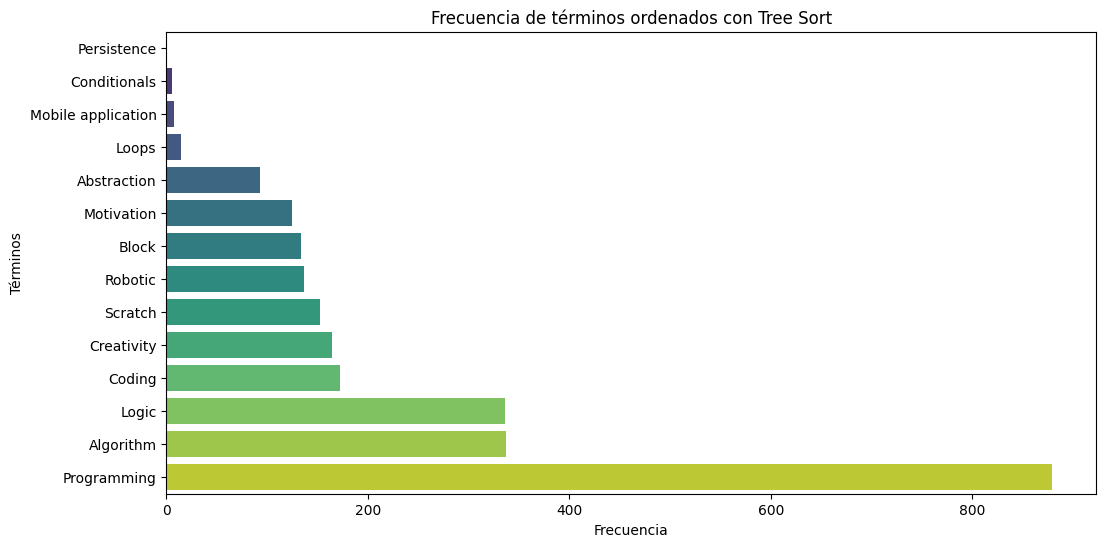

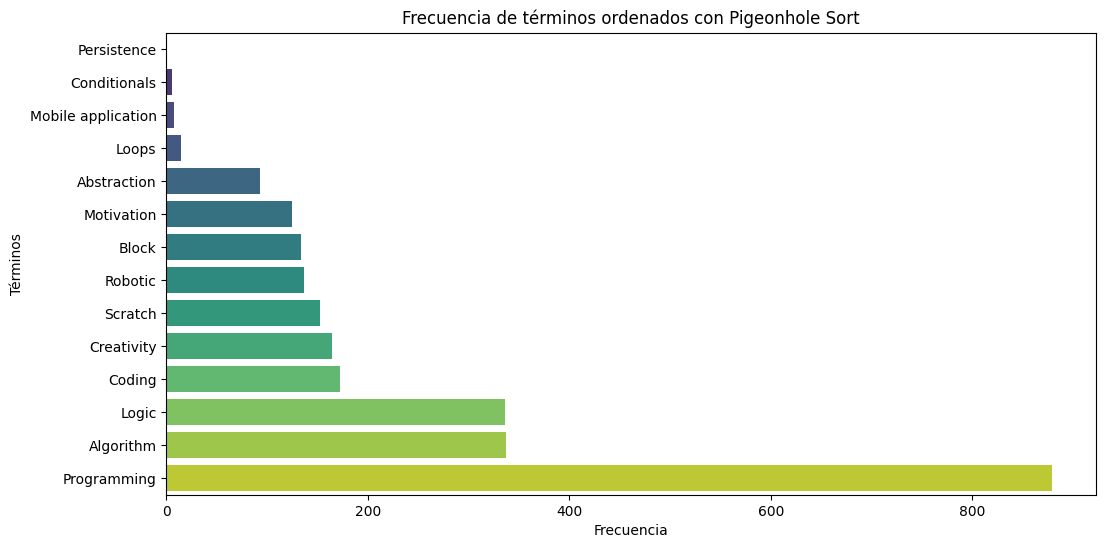

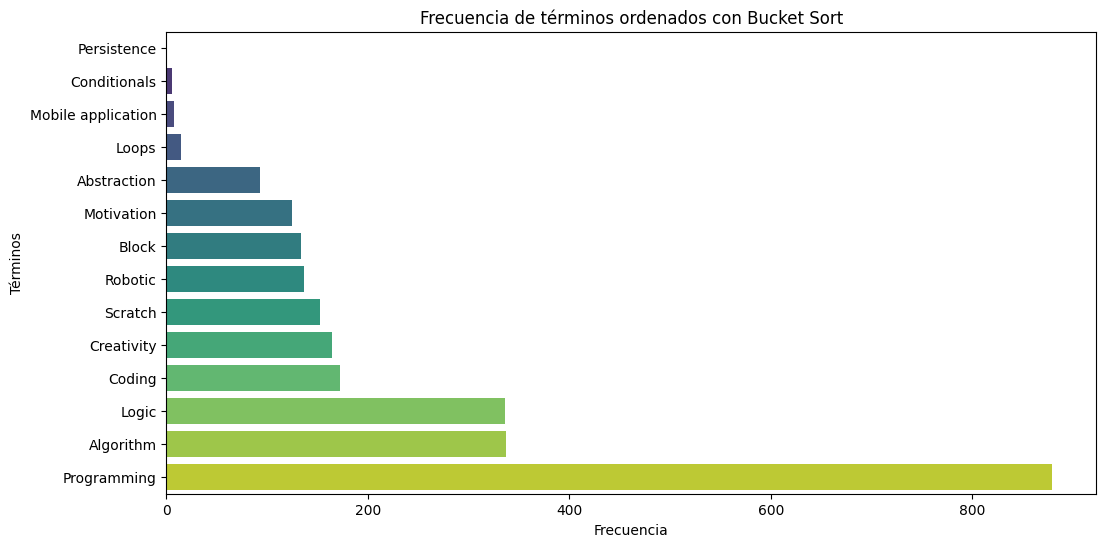

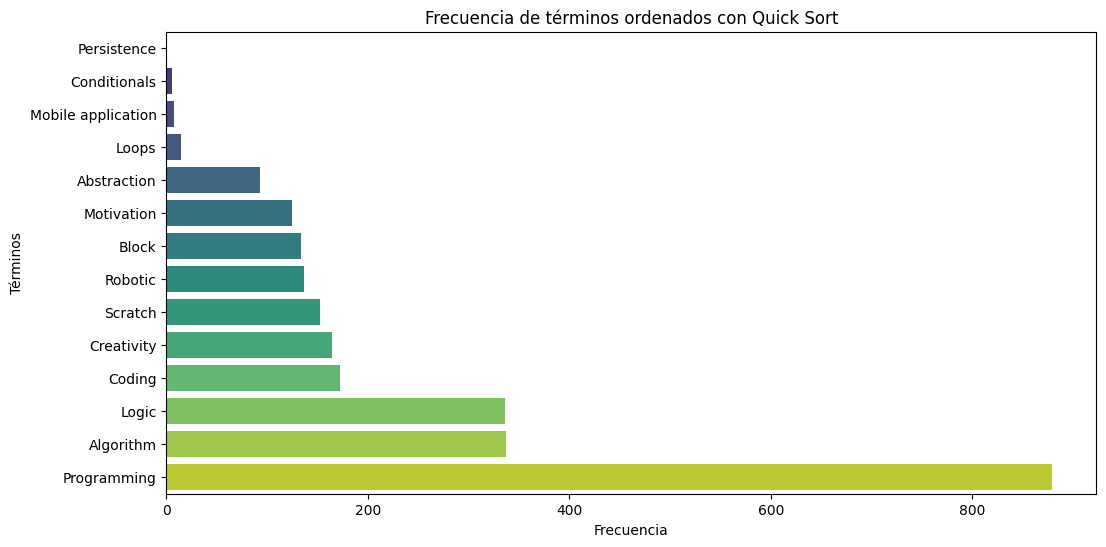

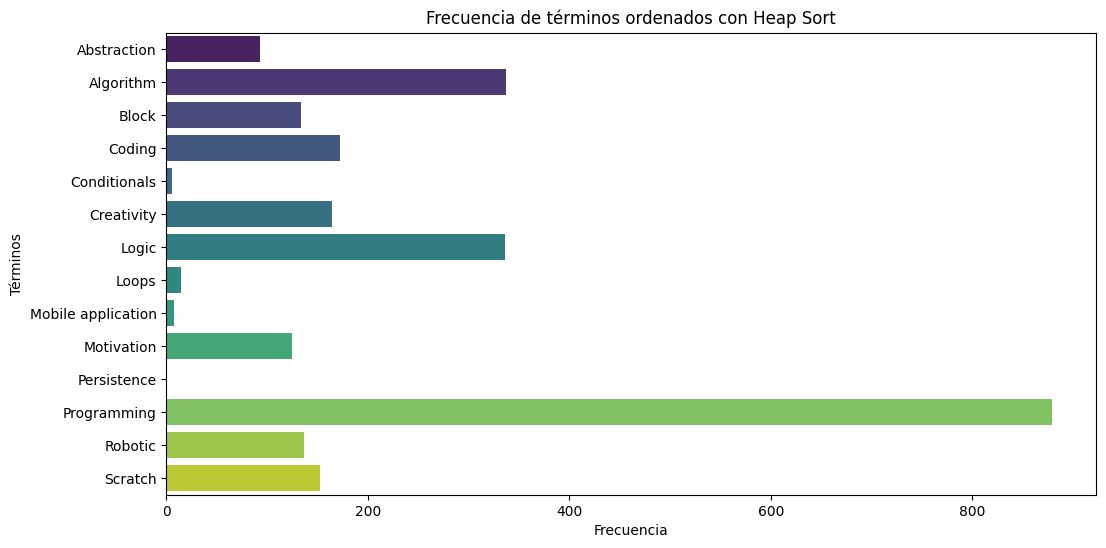

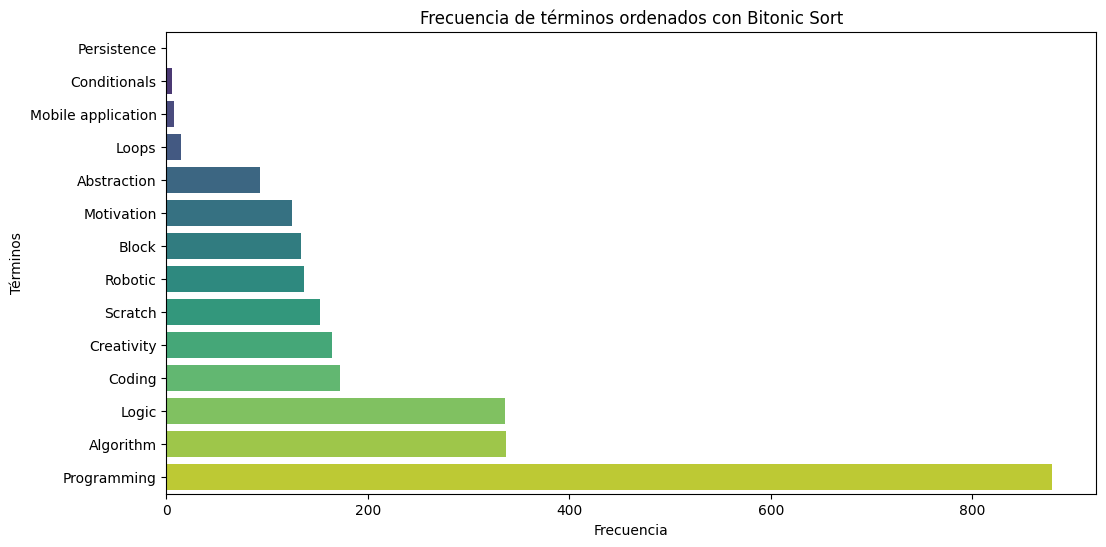

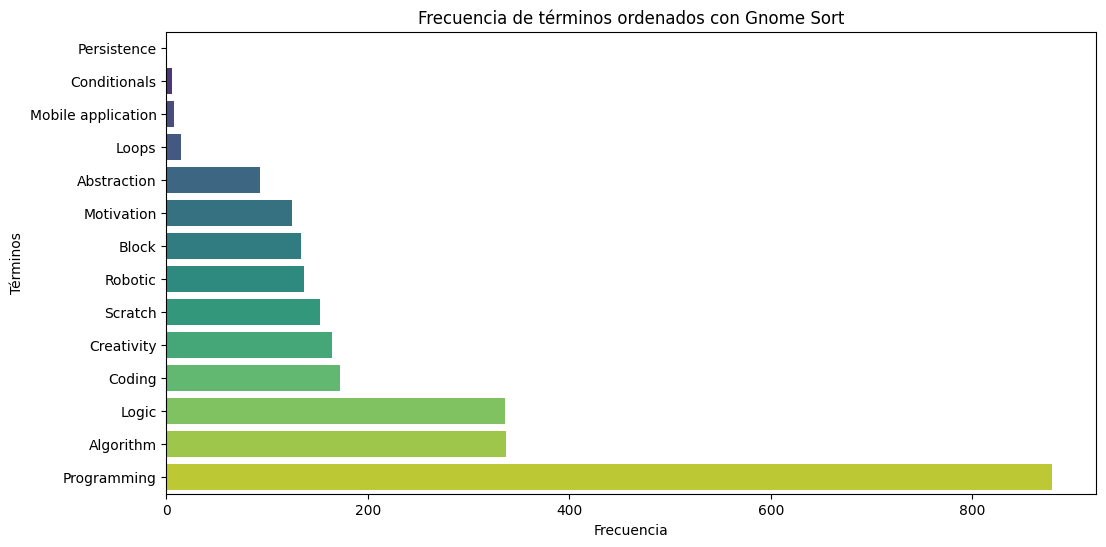

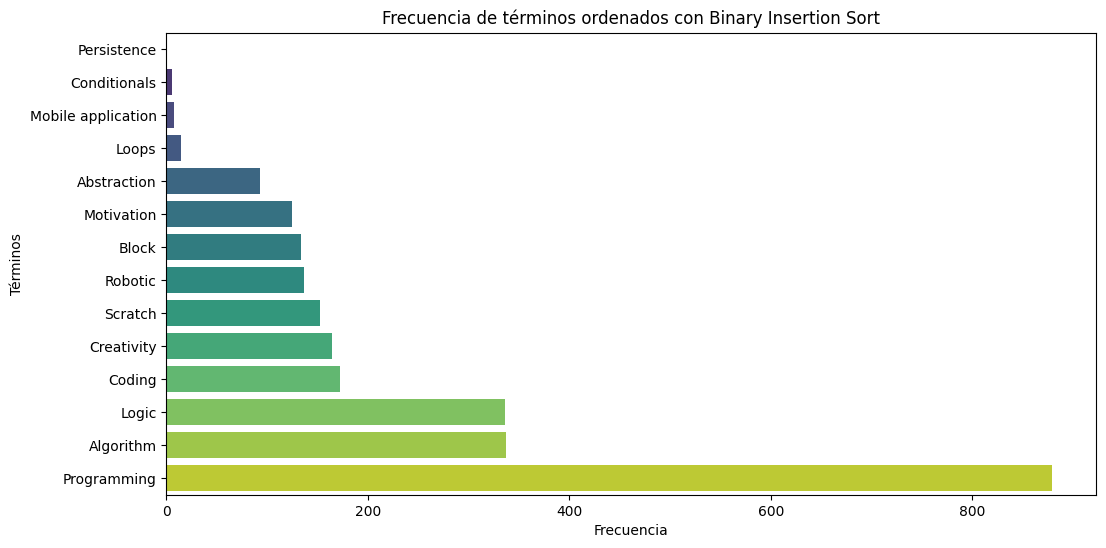

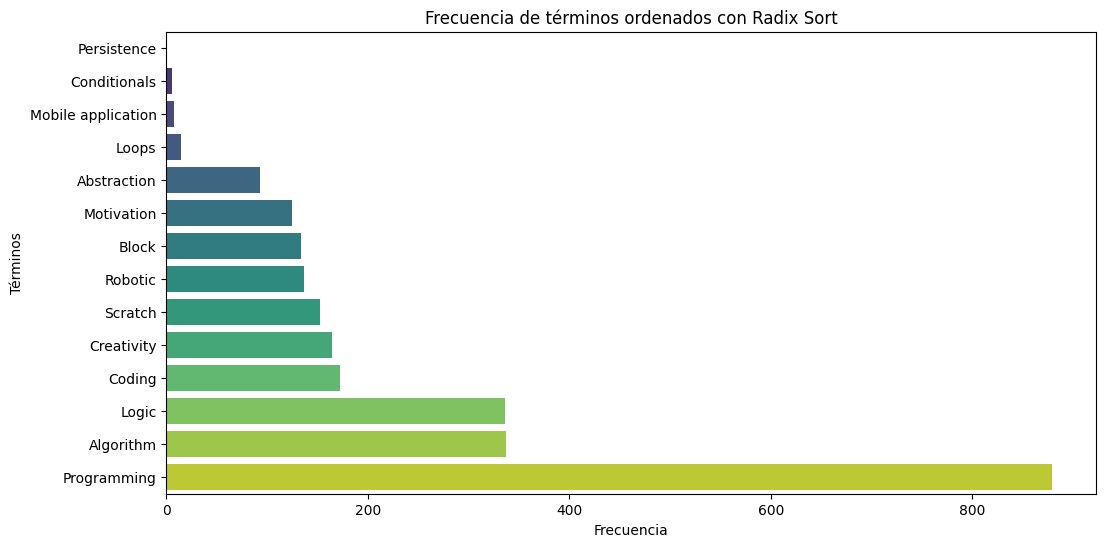

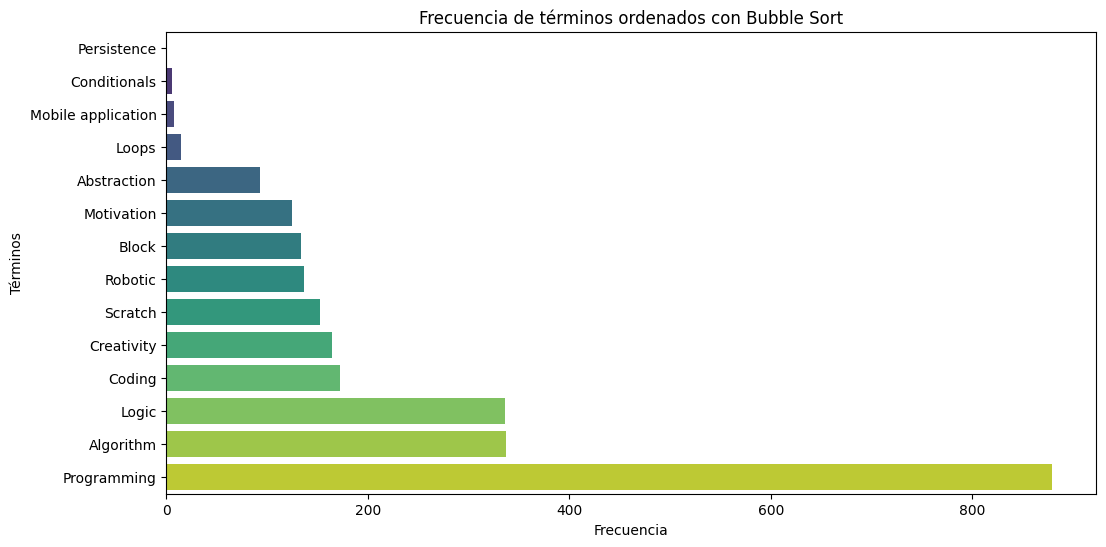

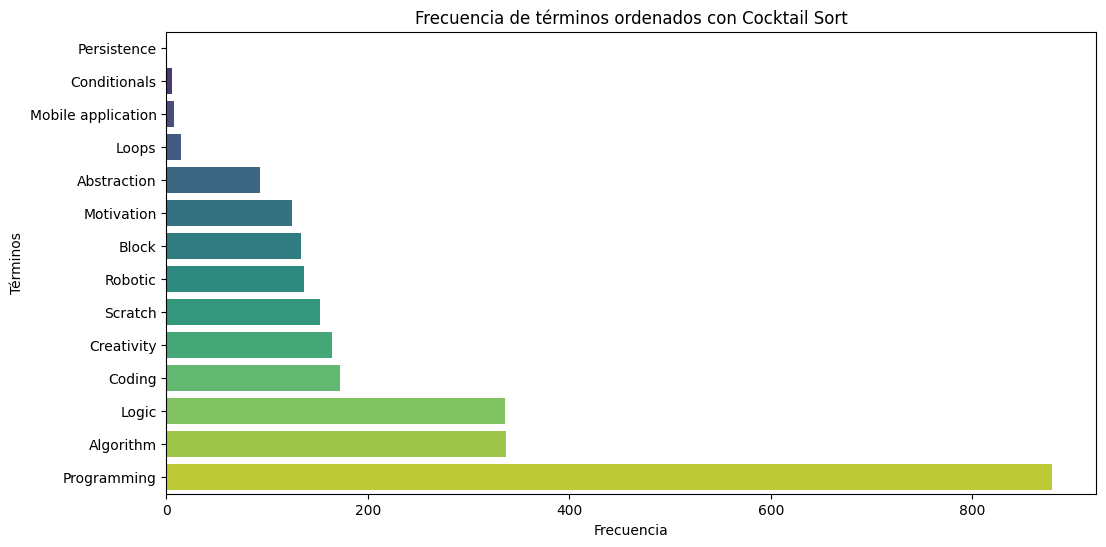

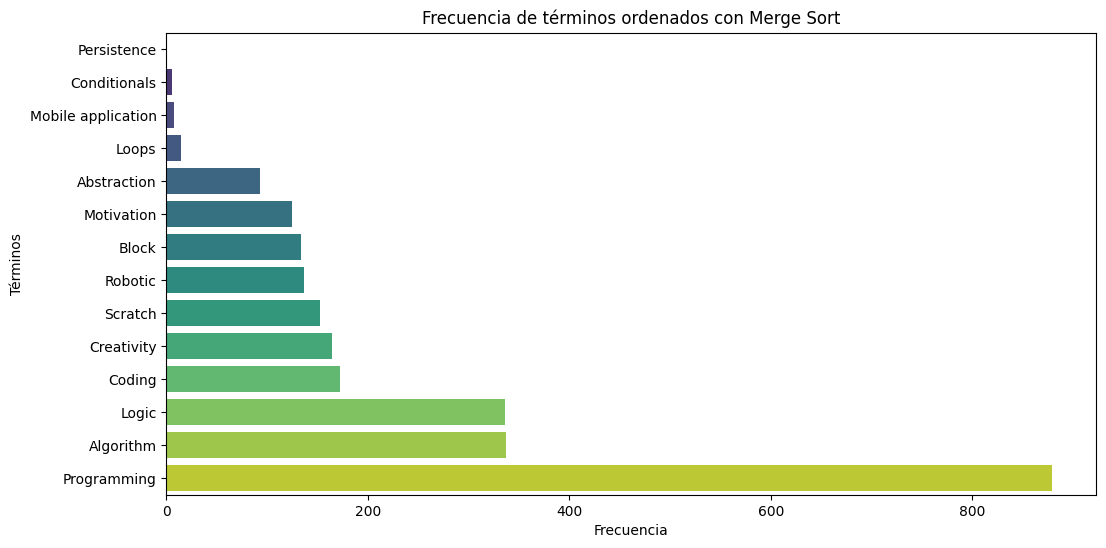

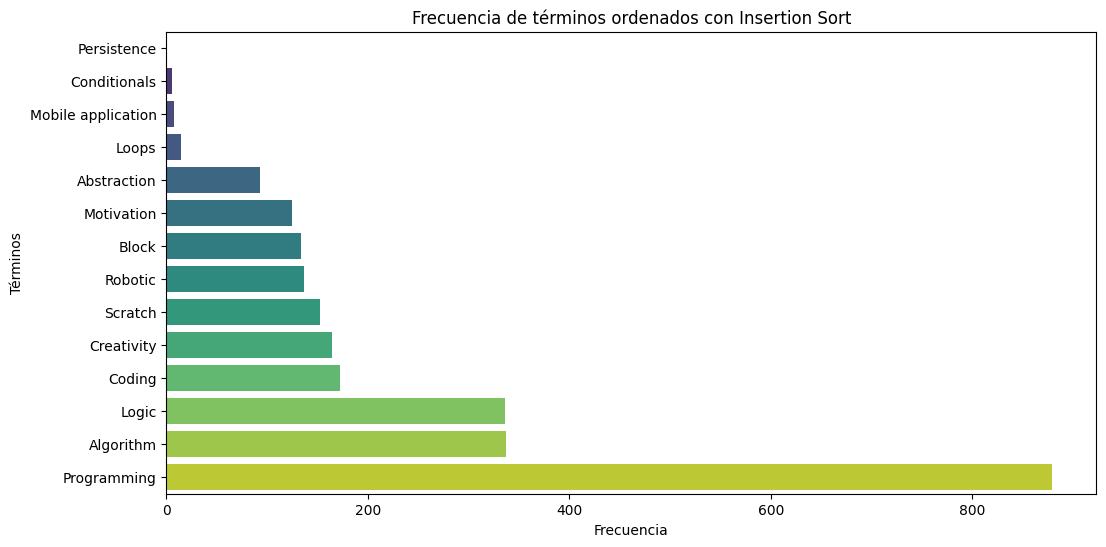

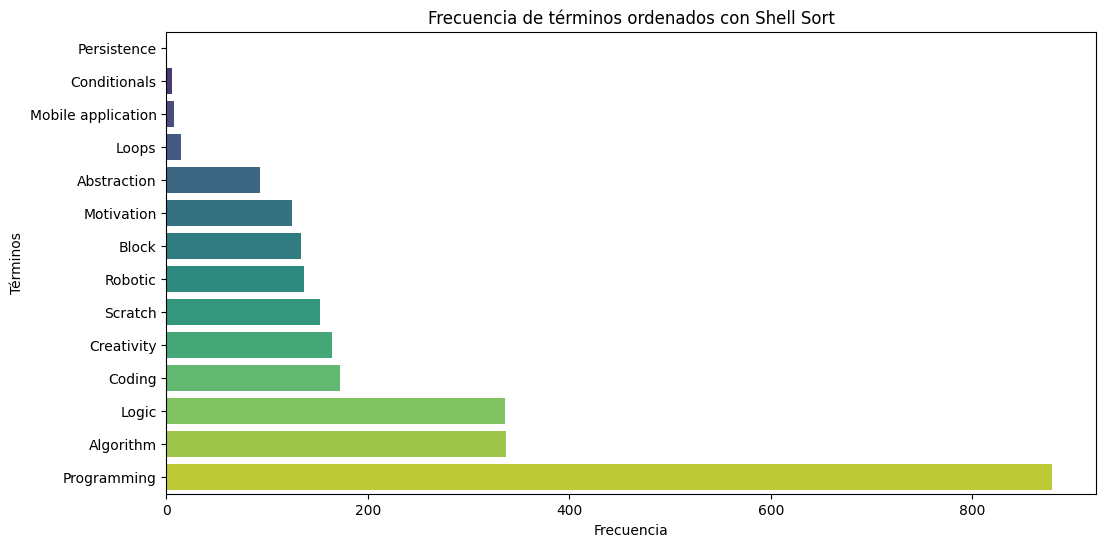

In [29]:
for name, algorithm in tsorting_algorithms.items():
    sorted_results, exec_time = measure_time(algorithm, list(frequencies.items()))

    # Extraer términos y frecuencias ordenadas
    terms_sorted = [x[0] for x in sorted_results]
    frequencies_sorted = [x[1] for x in sorted_results]

    # Configuración del gráfico
    plt.figure(figsize=(12, 6))
    sns.barplot(x=frequencies_sorted, y=terms_sorted, hue=terms_sorted, palette="viridis", legend=False)

    # Etiquetas y título automático con el nombre del algoritmo
    plt.xlabel("Frecuencia")
    plt.ylabel("Términos")
    plt.title(f"Frecuencia de términos ordenados con {name}")  # 🔥 Cambiado aquí

    # Mostrar el gráfico
    plt.show()